In [40]:
import matplotlib.pyplot as plt
import numpy as np
import IPython

basic implementation of the ks algorithm

In [41]:
def KS_1(x, N):
    # given the initial buffer x, produce a N-sample output
    #  by concatenating identical copies of the buffer
    y = x

    while len(y) < N:
        # keep appending until we reach or exceed the required length
        y = np.append(y, x)
    # trim the excess
    y = y[0:N+1]
    return y

In [42]:
Fs = 16000 # 16 KHz sampling rate

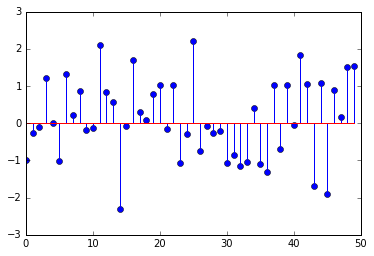

In [43]:
b = np.random.randn(50)
plt.stem(b)
plt.show()

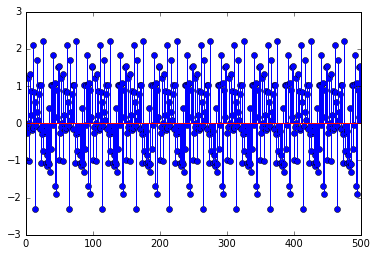

In [44]:
y = KS_1(b, Fs * 1)

# we can look at a few periods:
plt.stem(y[0:500])
plt.show()

In [45]:
IPython.display.Audio(y, rate=Fs)

#### implementation based on block diagram of signal processing technique.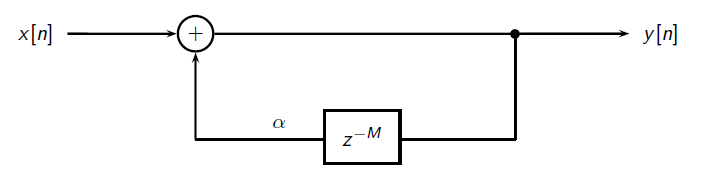

In [46]:
def KS_2(x, N):
    # length of the input
    M = len(x)
    # prepare the output
    y = np.zeros(N)
    # this is NOT an efficient implementation, but it shows the general principle
    # we assume zero initial conditions (y[n]=0 for n < 0)
    for n in range(0, N):
        y[n] = (x[n] if n < M else 0) + (y[n-M] if n-M >= 0 else 0)
    return y

In [47]:
IPython.display.Audio(KS_2(np.random.rand(50), Fs * 2), rate=Fs)

using decaying factor alpha in above code

In [48]:
def KS_3(x, N, alpha = 0.99):
    M = len(x)
    y = np.zeros(N)
    # 
    for n in range(0, N):
        y[n] = (x[n] if n < M else 0) + alpha * (y[n-M] if n-M >= 0 else 0)
    return y

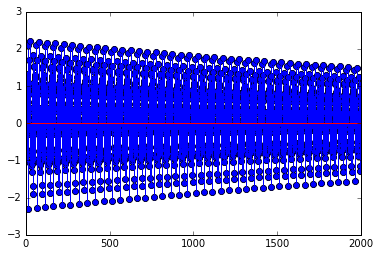

In [52]:
y = KS_3(b, Fs * 2)
plt.stem(y[0:2000]);
plt.show()

In [50]:
IPython.display.Audio(y, rate=Fs)

In [53]:
def KS(x, N, alpha = 0.99):
    # we will adjust alpha so that all notes have a decay
    #  comparable to that of a buf len of 50 samples
    REF_LEN = 50
    M = len(x)
    a = alpha ** (float(M) / REF_LEN)
    y = np.zeros(N)
    # 
    for n in range(0, N):
        y[n] = (x[n] if n < M else 0) + a * (y[n-M] if n-M >= 0 else 0)
    return y

In [54]:
IPython.display.Audio(KS(np.random.rand(50), Fs * 2), rate=Fs)

In [56]:
IPython.display.Audio(KS(np.random.rand(10), Fs * 2), rate=Fs)